#### EDA Case Study

**Introduction**

This case study aims to give an idea of applying EDA in a real business scenario. In this case study, we will develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimize the risk of losing money while lending to customers.

**Business Understanding**

The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. Suppose we work for a consumer finance company which specializes in lending various types of loans to urban customers. We will have to use EDA to analyze the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,

All other cases: All other cases when the payment is paid on time.

When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

Approved: The Company has approved loan Application

Cancelled: The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client he received worse pricing which he did not want.

Refused: The company had rejected the loan (because the client does not meet their requirements etc.).

Unused offer: Loan has been cancelled by the client but on different stages of the process.

In this case study, we will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

**Business Objectives**

This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilize this knowledge for its portfolio and risk assessment.

**Data Understanding**

This dataset has 3 files as explained below:

`application_data.csv` contains all the information of the client at the time of application.
The data is about whether a client has payment difficulties.

`previous_application.csv` contains information about the client’s previous loan data. It contains the data whether the previous application had been Approved, Cancelled, Refused or Unused offer.

`columns_description.xlsx` is data dictionary which describes the meaning of the variables.


I have given a link to the data files in a drive folder [here](https://drive.google.com/drive/folders/1YpPjU4Y12MPrMdWaNDa6rS2MNirh2FG3?usp=sharing).  I suggest unzipping them and putting them in your google drive, and link to them directly using colab and its "mount drive" functionality.



---
# **INTRODUCTION:**

This project applies exploratory data analysis (EDA) to a consumer finance dataset to identify patterns associated with loan default risk. The goal is to understand which customer and loan characteristics are strong indicators of repayment difficulty and to translate these findings into business-relevant insights for credit risk decision-making.

# **Project Overview & Team Roles:**

Lead Analyst (Brooke): Responsible for defining the business objective, conducting the core EDA on application data, interpreting results, and delivering final insights and recommendations.

Data & Visualization Analyst (Lujun): Responsible for data loading and preparation, handling missing values and anomalies, performing supporting analysis using previous application data, and producing all visualizations used in the analysis.

This division ensures a clear analytical narrative supported by clean data, robust exploratory analysis, and well-designed visual evidence.


---



## Section 1 - Business & Problem Understanding (Brooke)

When a lender reviews a loan application, they need to make a judgement about the applicant's ability to repay. Approving someone who later defaults can lead to financial loss, while rejecting someone who would have repaid means losing a potential customer. Because the stakes are high on both sides, financial institutions rely heavily on data to make those decisions.

In this project, we will explore a customer dataset to better understand the patterns that are are associated with repayment difficulty. The data includes information about each applicant at the time they apply, with records of their previous loan applications. By examining these features, we aim to understand patterns that distinguish higher-risk applicants from lower-risk ones.

Our goal is to find meaningful relationships in the data that can strengthen credit risk decision-making and support more informed portfolio and risk assesments. Understanding these patterns can help a lender adjust loan amounts, evaluate risky applicants more carefully, or identify groups that may warrant additional review. The following sections walk through this process step-by-step, starting with understanding the data and then moving into deeper exploratory analysis.

## Section 2: Data Understanding & Preparation (Brooke)

Before beginning the exploratory analysis,we first review and organize the datasets used in this project to uncover data-driven relationships before we move into protfolio and risk assesments.

### 2.1 Overview of the Data Sources

**application_data.csv** - contains applicant information at the time of the current loan application, including demographic factors, income, assets, and past experience of payment difficulties (target variable).

**previous_application.csv** - provides details about applicants' past loan applications, including their outcomes (approved, refused, cancelled, unused) and previous credit amounts.

**columns_description.xlsx** - a data dictionary that defines and descibres the variables in the dataset.

These three data sets work together to give us a clearer idea of the applicants past lending tendencies as well as their current status.

### 2.2 Initial Structural Review

After loading the data, we examine the dataset usings functions such as
.head(), .info(), and .describe()

This helps us understand the number of rows and columns, the variable types (numerical vs categorical), any missing or inconsistent values, the range, and any key features.

Part of this step allows us to see variables with skewed distribution. Income and credit amounts are strong examples of these, where we can use logs to help make their patterns clear in the analysis tha follows.

In addition to looking at the structure of the dataset, we also take a  look at missing values. Since the application data contains a variety of demographic, financial, and credit-related data, we expect to find some  missing values. Plotting the variables with the highest number of missing values helps us identify features for later in the analysis.


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
application_data = pd.read_csv('application_data.csv')
previous_application = pd.read_csv('previous_application.csv')
description_application = pd.read_excel('columns_description.xlsx')

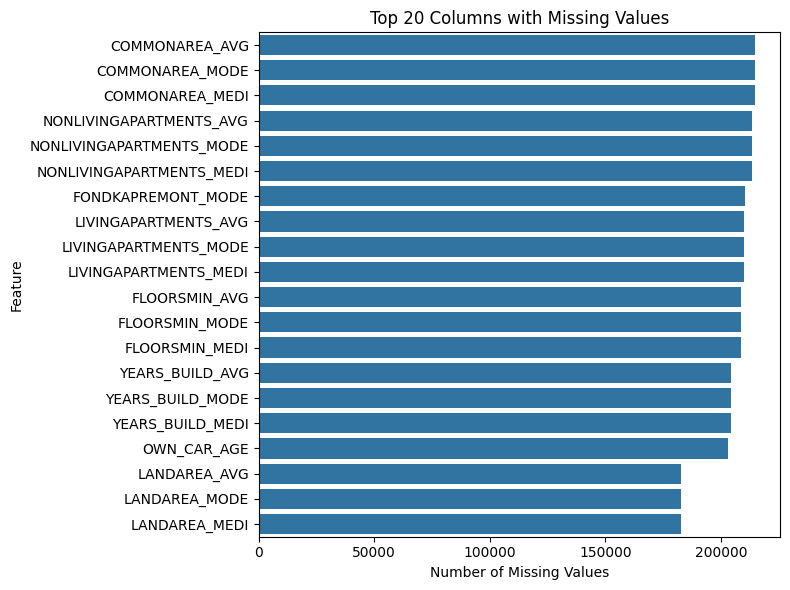

In [ ]:
# Missing values per column (top 20)
missing = application_data.isnull().sum().nlargest(20)

plt.figure(figsize=(8,6))
sns.barplot(x=missing.values, y=missing.index)
plt.title('Top 20 Columns with Missing Values')
plt.xlabel('Number of Missing Values')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

### application_data.csv:

In [ ]:
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [ ]:
application_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


### previous_application.csv:

In [ ]:
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [ ]:
previous_application.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


### columns_description.xlsx:

In [ ]:
description_application = pd.read_excel('columns_description.xlsx')

In [ ]:
description_application.head()

,Unnamed: 0,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN


In [ ]:
description_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   160 non-null    int64 
 1   Table        160 non-null    object
 2   Row          160 non-null    object
 3   Description  160 non-null    object
 4   Special      69 non-null     object
dtypes: int64(1), object(4)
memory usage: 6.4+ KB


In [ ]:
description_application.describe()

,Unnamed: 0
count,160.00000
mean,94.58750
std,64.12727
min,1.00000
25%,42.75000
50%,82.50000
75%,122.25000
max,213.00000


### Describing shape from these functions:
Running .info() shows that the application dataset has over 300,000 rows and 122 columns, including numerical and categorical features. Several variables contain missing values, which we keep in mind for the analysis that follows. The .describe() summary also confirms that some financial variables span a wide range, which is typical for income and credit data.

### 2.3 Basic Preparation for Analysis

After reviewing the structure of each dataset, we make a few small setup steps to prepare for the analysis that follows. First, we create shorter  names for the datasets (app for the application data, prev for the previous applications, and desc for the data dictionary) to keep the later code easier to read.

We also confirm that the key identifier SK_ID_CURR is available in both the application and previous application datasets so that we can link current applications to past behavior in later sections.

At this stage, the main goal is simply to make sure the data is loaded correctly, has the expected shape, and is organized in a way that sets up the rest of the exploratory work. Sections 3-5 will focus on the handling of missing values, skewed variables, and outliers in the univariate, bivariate, and segment analyses.


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Using shorter aliases for convenience
app = application_data
prev = previous_application
desc = description_application

## Section 3 — Univariate Analysis (Lujun)

This section explores the main variables in the dataset using univariate analysis. The purpose of this section is to understand the basic distributions of applicant characteristics, such as demographics, income, and loan-related variables, before analyzing how these factors relate to default behavior. By looking at each variable on its own, we can get a general sense of the data and identify patterns such as uneven distributions, extreme values, or imbalances that may be important in later analysis.

-------

### 3.1 Distribution of the Target Variable
The target variable shows whether an applicant had payment difficulties during loan repayment. Looking at the distribution of this variable helps us understand how common default cases are in the dataset and whether the data is balanced between default and non-default outcomes.

From the distribution, we can see that most applicants did not default, while only a smaller portion experienced payment difficulties. This type of imbalance is common in real-world loan datasets and should be kept in mind when interpreting the results of later analyses.ses.

In [ ]:
target_dist = app['TARGET'].value_counts().to_frame(name='count')
target_dist['proportion'] = app['TARGET'].value_counts(normalize=True)

target_dist

,count,proportion
TARGET,,
0,282686,0.919271
1,24825,0.080729


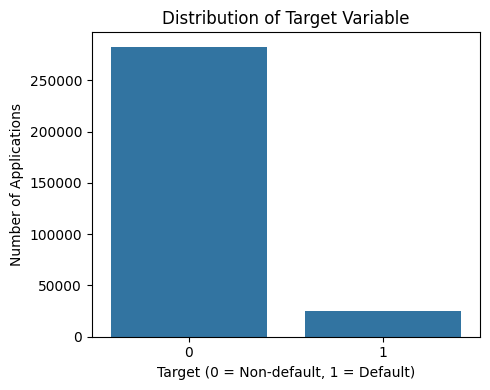

In [ ]:
plt.figure(figsize=(5,4))
sns.countplot(x='TARGET', data=app)
plt.title('Distribution of Target Variable')
plt.xlabel('Target (0 = Non-default, 1 = Default)')
plt.ylabel('Number of Applications')
plt.tight_layout()
plt.show()

-----
### 3.2 Applicant Demographic Characteristics

This subsection looks at the basic demographic characteristics of loan applicants. These variables give a general picture of who the applicants are and provide useful background for understanding the dataset.

The distribution of applicants by gender is not evenly balanced. In addition, the number of children varies across applicants, showing differences in household structure and family responsibilities.

At this stage, we focus only on the overall distributions of these demographic variables and do not yet consider how they relate to default outcomes.

In [ ]:
gender_dist = app['CODE_GENDER'].value_counts().to_frame(name='count')
gender_dist['proportion'] = app['CODE_GENDER'].value_counts(normalize=True)

gender_dist

,count,proportion
CODE_GENDER,,
F,202448,0.658344
M,105059,0.341643
XNA,4,0.000013


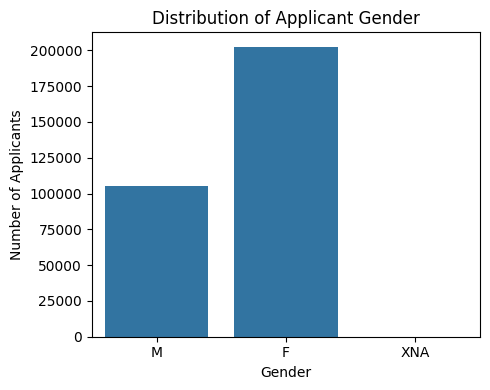

In [ ]:
plt.figure(figsize=(5,4))
sns.countplot(x='CODE_GENDER', data=app)
plt.title('Distribution of Applicant Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Applicants')
plt.tight_layout()
plt.show()

In [ ]:
app['CNT_CHILDREN'].describe()

,CNT_CHILDREN
count,307511.000000
mean,0.417052
std,0.722121
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,19.000000


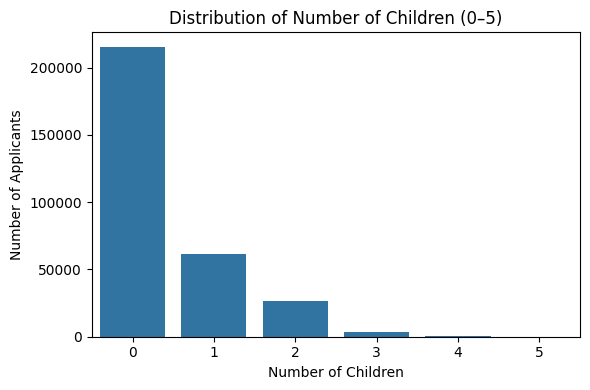

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(
    x='CNT_CHILDREN',
    data=app[app['CNT_CHILDREN'] <= 5]
)
plt.title('Distribution of Number of Children (0–5)')
plt.xlabel('Number of Children')
plt.ylabel('Number of Applicants')
plt.tight_layout()
plt.show()

----

### 3.3 Asset Ownership and Housing Characteristics

This subsection focuses on asset ownership and housing-related characteristics of loan applicants. These variables offer a simple way to understand differences in applicants’ financial situations and levels of stability.

The dataset includes information on whether applicants own a car or real estate. From the distributions, we can see that not all applicants own major assets, indicating variation in financial background and living conditions across the sample.

At this stage, the analysis remains descriptive and does not examine how asset ownership is related to default behavior.

In [ ]:
asset_cols = ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY']

for col in asset_cols:
    print(f"\n{col}")
    dist = app[col].value_counts().to_frame(name='count')
    dist['proportion'] = app[col].value_counts(normalize=True)
    display(dist)


FLAG_OWN_CAR


,count,proportion
FLAG_OWN_CAR,,
N,202924,0.659892
Y,104587,0.340108



FLAG_OWN_REALTY


,count,proportion
FLAG_OWN_REALTY,,
Y,213312,0.693673
N,94199,0.306327


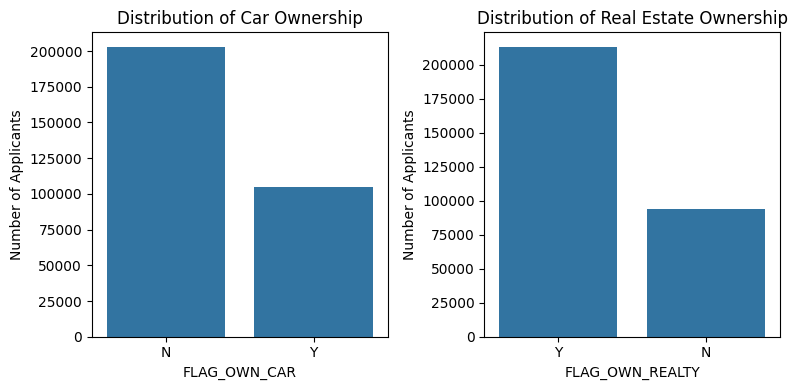

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

sns.countplot(x='FLAG_OWN_CAR', data=app, ax=axes[0])
axes[0].set_title('Distribution of Car Ownership')
axes[0].set_xlabel('FLAG_OWN_CAR')
axes[0].set_ylabel('Number of Applicants')

sns.countplot(x='FLAG_OWN_REALTY', data=app, ax=axes[1])
axes[1].set_title('Distribution of Real Estate Ownership')
axes[1].set_xlabel('FLAG_OWN_REALTY')
axes[1].set_ylabel('Number of Applicants')

plt.tight_layout()
plt.show()

------
### 3.4 Loan Amount and Income Distributions

This subsection looks at the key financial variables in the application data: total income, credit amount, and annuity amount. These variables describe the overall scale of applicants’ finances and the size of the loans they are applying for.

When we inspect their distributions, these variables are clearly not “evenly spread out.” Most values are relatively small to medium, but there are also some very large values, which creates a long right tail. Because of this skewness, we use log-transformed versions (log1p) to make the distributions easier to visualize and compare.

In [ ]:
fin_cols = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY']

summary = app[fin_cols].describe(percentiles=[.5, .9, .95, .99]).T
summary

,count,mean,std,min,50%,90%,95%,99%,max
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,25650.0,147150.0,270000.0,337500.0,472500.0,117000000.0
AMT_CREDIT,307511.0,599025.999706,402490.776996,45000.0,513531.0,1133748.0,1350000.0,1854000.0,4050000.0
AMT_ANNUITY,307499.0,27108.573909,14493.737315,1615.5,24903.0,45954.0,53325.0,70006.5,258025.5


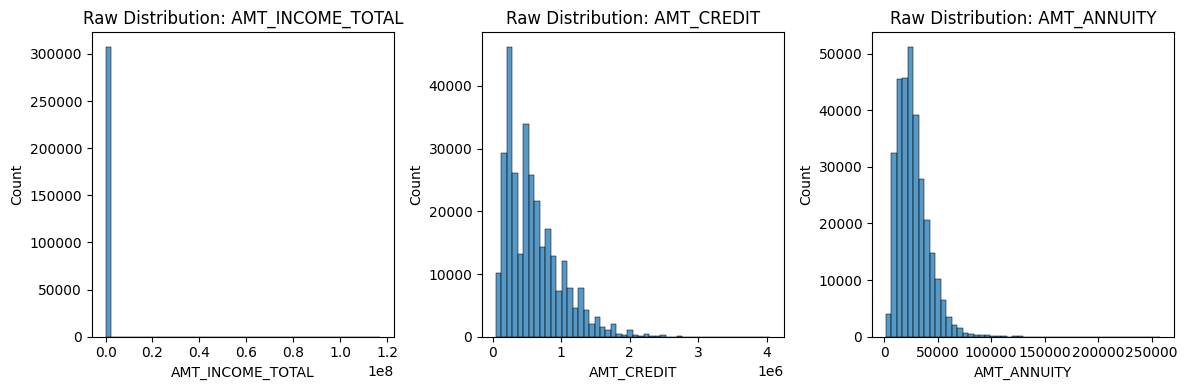

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for i, col in enumerate(fin_cols):
    sns.histplot(app[col], bins=50, ax=axes[i])
    axes[i].set_title(f'Raw Distribution: {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

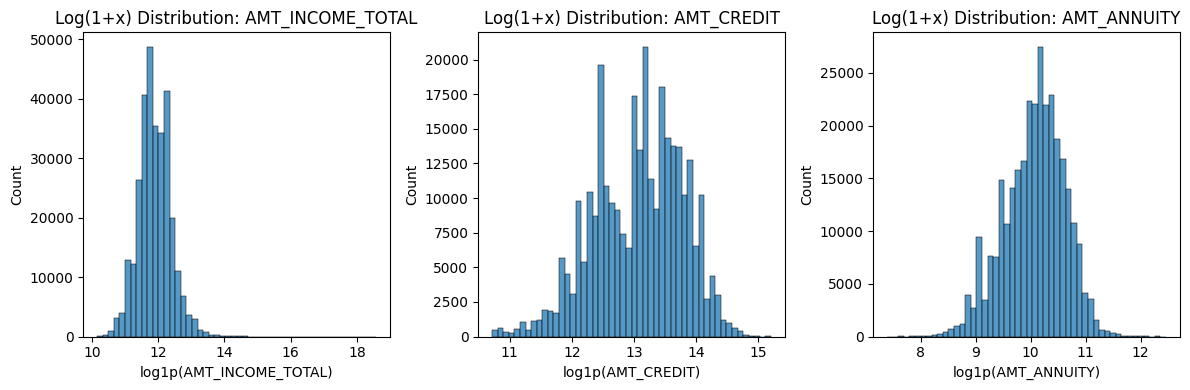

In [ ]:
app_log = app[fin_cols].apply(lambda s: np.log1p(s))

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for i, col in enumerate(fin_cols):
    sns.histplot(app_log[col], bins=50, ax=axes[i])
    axes[i].set_title(f'Log(1+x) Distribution: {col}')
    axes[i].set_xlabel(f'log1p({col})')
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

----

### 3.5 Credit Bureau Request Behavior

This subsection looks at variables related to credit bureau requests, which can be viewed as a rough indicator of how often an applicant has recently had their credit checked. These features can help describe differences in applicants’ recent credit-seeking activity.

From the distributions, many applicants have zero requests in several time windows, while a smaller group has multiple requests. Because these variables are sparse (lots of zeros), we summarize them using simple statistics and visualize the number of requests in a few key time windows rather than relying on standard histograms.

In [ ]:
bureau_cols = [
    'AMT_REQ_CREDIT_BUREAU_HOUR',
    'AMT_REQ_CREDIT_BUREAU_DAY',
    'AMT_REQ_CREDIT_BUREAU_WEEK',
    'AMT_REQ_CREDIT_BUREAU_MON',
    'AMT_REQ_CREDIT_BUREAU_QRT',
    'AMT_REQ_CREDIT_BUREAU_YEAR'
]

In [ ]:
bureau_summary = pd.DataFrame({
    'non_missing_rate': app[bureau_cols].notna().mean(),
    'zero_rate': (app[bureau_cols].fillna(0) == 0).mean(),
    'mean': app[bureau_cols].mean(numeric_only=True),
    'median': app[bureau_cols].median(numeric_only=True),
    'p90': app[bureau_cols].quantile(0.90, numeric_only=True),
    'p99': app[bureau_cols].quantile(0.99, numeric_only=True),
})

bureau_summary

,non_missing_rate,zero_rate,mean,median,p90,p99
AMT_REQ_CREDIT_BUREAU_HOUR,0.864984,0.994712,0.006402,0.0,0.0,0.0
AMT_REQ_CREDIT_BUREAU_DAY,0.864984,0.995158,0.007000,0.0,0.0,0.0
AMT_REQ_CREDIT_BUREAU_WEEK,0.864984,0.972242,0.034362,0.0,0.0,1.0
AMT_REQ_CREDIT_BUREAU_MON,0.864984,0.857699,0.267395,0.0,1.0,4.0
AMT_REQ_CREDIT_BUREAU_QRT,0.864984,0.835534,0.265474,0.0,1.0,2.0
AMT_REQ_CREDIT_BUREAU_YEAR,0.864984,0.368507,1.899974,1.0,4.0,8.0


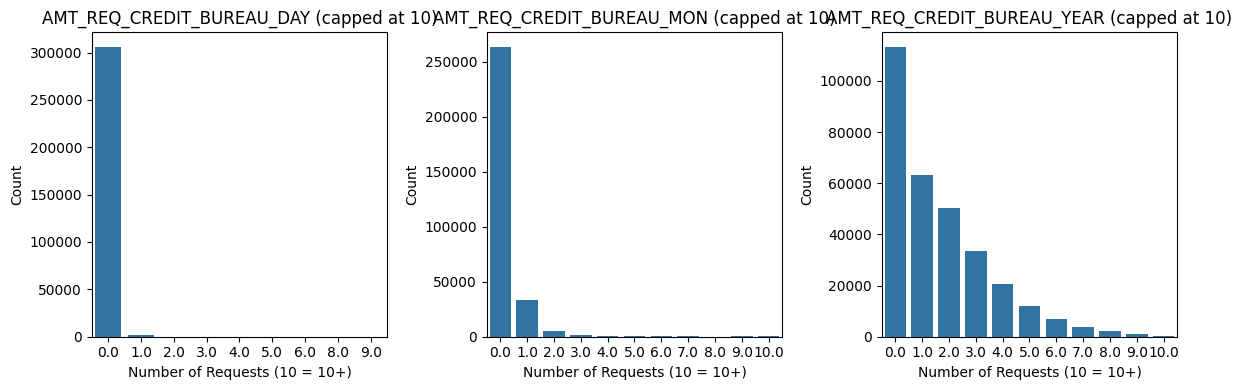

In [ ]:
plot_cols = [
    'AMT_REQ_CREDIT_BUREAU_DAY',
    'AMT_REQ_CREDIT_BUREAU_MON',
    'AMT_REQ_CREDIT_BUREAU_YEAR'
]

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for i, col in enumerate(plot_cols):
    x = app[col].fillna(0)
    x_capped = x.clip(upper=10)
    sns.countplot(x=x_capped, ax=axes[i])
    axes[i].set_title(f'{col} (capped at 10)')
    axes[i].set_xlabel('Number of Requests (10 = 10+)')
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

-----

### 3.6 Previous Application Overview

This subsection provides a quick overview of the `previous_application` dataset, which contains information about applicants’ past loan applications. Looking at these variables helps us understand applicants’ historical borrowing behavior and how past applications were processed.

In this section, we focus on basic distributions such as application outcomes (approved/refused/cancelled), common rejection reasons, and the typical sizes of previous applications. This is still a descriptive step and does not yet connect previous applications to current default outcomes.

In [ ]:
prev.shape, prev.columns[:10]

((1670214, 37),
 Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
        'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
        'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START'],
       dtype='object'))

In [ ]:
status_dist = prev['NAME_CONTRACT_STATUS'].value_counts().to_frame('count')
status_dist['proportion'] = prev['NAME_CONTRACT_STATUS'].value_counts(normalize=True)
status_dist

,count,proportion
NAME_CONTRACT_STATUS,,
Approved,1036781,0.620747
Canceled,316319,0.189388
Refused,290678,0.174036
Unused offer,26436,0.015828


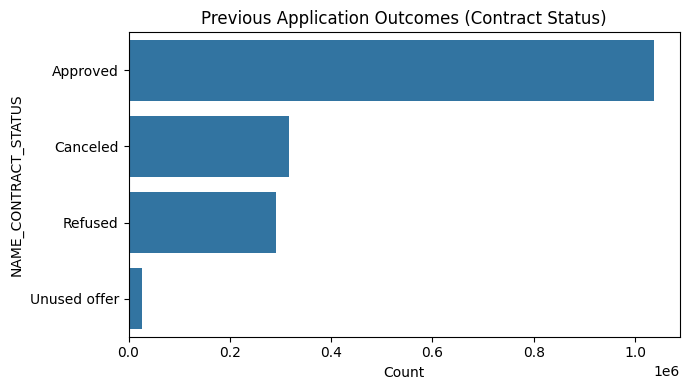

In [ ]:
plt.figure(figsize=(7,4))
sns.countplot(y='NAME_CONTRACT_STATUS', data=prev, order=prev['NAME_CONTRACT_STATUS'].value_counts().index)
plt.title('Previous Application Outcomes (Contract Status)')
plt.xlabel('Count')
plt.ylabel('NAME_CONTRACT_STATUS')
plt.tight_layout()
plt.show()

In [ ]:
amt_cols = ['AMT_APPLICATION', 'AMT_CREDIT']

prev[amt_cols].describe(percentiles=[.5,.9,.95,.99]).T

,count,mean,std,min,50%,90%,95%,99%,max
AMT_APPLICATION,1670214.0,175233.860360,292779.762387,0.0,71046.0,450000.0,787500.0,1350000.0,6905160.0
AMT_CREDIT,1670213.0,196114.021218,318574.616546,0.0,80541.0,533160.0,886500.0,1515377.7,6905160.0


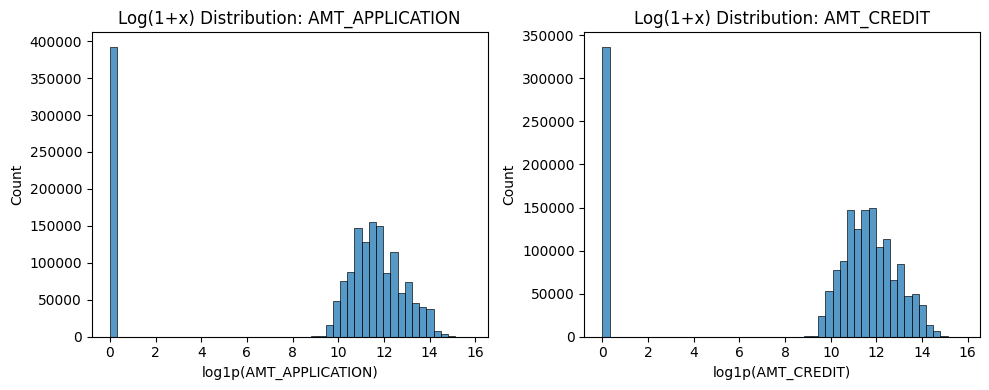

In [ ]:
prev_log = prev[amt_cols].apply(lambda s: np.log1p(s))

fig, axes = plt.subplots(1, 2, figsize=(10,4))
for i, col in enumerate(amt_cols):
    sns.histplot(prev_log[col], bins=50, ax=axes[i])
    axes[i].set_title(f'Log(1+x) Distribution: {col}')
    axes[i].set_xlabel(f'log1p({col})')
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

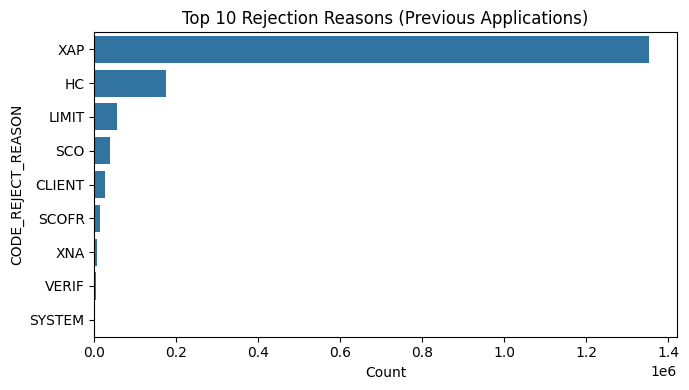

In [ ]:
reject_top = prev['CODE_REJECT_REASON'].value_counts().head(10)

plt.figure(figsize=(7,4))
sns.barplot(x=reject_top.values, y=reject_top.index)
plt.title('Top 10 Rejection Reasons (Previous Applications)')
plt.xlabel('Count')
plt.ylabel('CODE_REJECT_REASON')
plt.tight_layout()
plt.show()

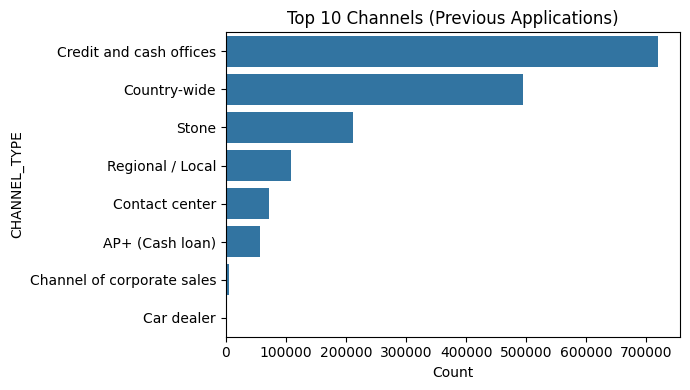

In [ ]:
channel_top = prev['CHANNEL_TYPE'].value_counts().head(10)

plt.figure(figsize=(7,4))
sns.barplot(x=channel_top.values, y=channel_top.index)
plt.title('Top 10 Channels (Previous Applications)')
plt.xlabel('Count')
plt.ylabel('CHANNEL_TYPE')
plt.tight_layout()
plt.show()

------

## Section 4 — Bivariate Analysis (Variables vs. Default)(Lujun)

In this section, we compare key variables against the target (default vs. non-default). The goal is to see which features show clear differences in default rates. For numeric variables, we use bins (groups) to make patterns easier to interpret, and for categorical variables, we compare default rates across categories.

------
### 4.1 Default Rate by Income

In this subsection, we examine how default rates vary across different income levels. Instead of looking at raw income values, we divide applicants into income groups (deciles) to make the comparison clearer.

By grouping applicants into income bins from lowest to highest, we can observe how default rates change across income levels. This helps us understand whether income appears to be associated with repayment risk.

In [ ]:
df_income = app[['TARGET', 'AMT_INCOME_TOTAL']].copy()
df_income = df_income[df_income['AMT_INCOME_TOTAL'].notna()]

df_income['income_decile'] = pd.qcut(
    df_income['AMT_INCOME_TOTAL'],
    q=10,
    duplicates='drop'
)

In [ ]:
income_rate = (
    df_income
    .groupby('income_decile')['TARGET']
    .mean()
    .reset_index()
)

income_rate

/tmp/ipython-input-726317181.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('income_decile')['TARGET']


,income_decile,TARGET
0,"(25649.999, 81000.0]",0.081908
1,"(81000.0, 99000.0]",0.082232
2,"(99000.0, 112500.0]",0.087192
3,"(112500.0, 135000.0]",0.084894
4,"(135000.0, 147150.0]",0.090007
5,"(147150.0, 162000.0]",0.086407
6,"(162000.0, 180000.0]",0.084224
7,"(180000.0, 225000.0]",0.078065
8,"(225000.0, 270000.0]",0.070401
9,"(270000.0, 117000000.0]",0.061375


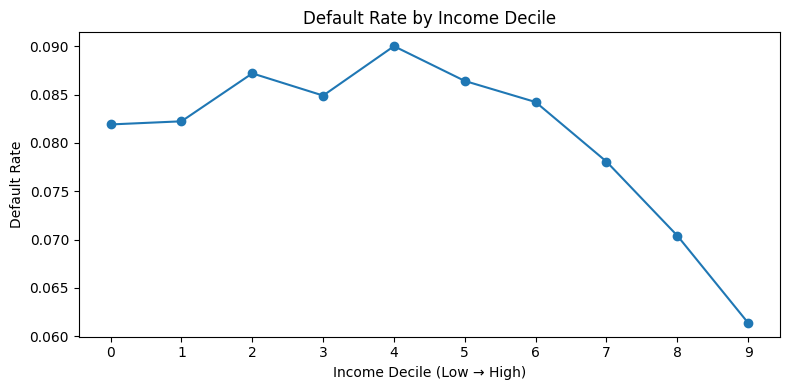

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(range(len(income_rate)), income_rate['TARGET'], marker='o')
plt.title('Default Rate by Income Decile')
plt.xlabel('Income Decile (Low → High)')
plt.ylabel('Default Rate')
plt.xticks(range(len(income_rate)))
plt.tight_layout()
plt.show()

Based on the income deciles, default rates are generally higher in the lower-to-middle income groups and lower in the highest income groups. For example, the default rate is around 8.2% in the lowest income decile (about $25.6k–$81k), stays around 8%–9% through the middle deciles, and then drops more clearly for higher income levels.

In the top income deciles, the default rate decreases to about 7.0% ($225k–$270k) and reaches the lowest level at about 6.1% in the highest income group ($270k+). Overall, this suggests that applicants with higher income tend to have a lower risk of default, even though the pattern is not perfectly smooth across every single bi

Note: The highest income bin has a very wide range because income is highly right-skewed and includes extreme values.n.

------
### 4.2 Default Rate by Credit Amount

In this subsection, we examine how default rates vary across different loan sizes. Similar to the income analysis, we group applications into credit amount deciles to make comparisons across different loan levels more clear.

By comparing default rates across these credit amount groups, we can observe whether applying for larger or smaller loans is associated with differences in default risk.

In [ ]:
df_credit = app[['TARGET', 'AMT_CREDIT']].copy()
df_credit = df_credit[df_credit['AMT_CREDIT'].notna()]

df_credit['credit_decile'] = pd.qcut(
    df_credit['AMT_CREDIT'],
    q=10,
    duplicates='drop'
)

In [ ]:
credit_rate = (
    df_credit
    .groupby('credit_decile')['TARGET']
    .mean()
    .reset_index()
)

credit_rate

/tmp/ipython-input-4281589235.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('credit_decile')['TARGET']


,credit_decile,TARGET
0,"(44999.999, 180000.0]",0.067221
1,"(180000.0, 254700.0]",0.077772
2,"(254700.0, 306306.0]",0.082071
3,"(306306.0, 432000.0]",0.100335
4,"(432000.0, 513531.0]",0.095893
5,"(513531.0, 604152.0]",0.105220
6,"(604152.0, 755190.0]",0.085364
7,"(755190.0, 900000.0]",0.070799
8,"(900000.0, 1133748.0]",0.068823
9,"(1133748.0, 4050000.0]",0.053280


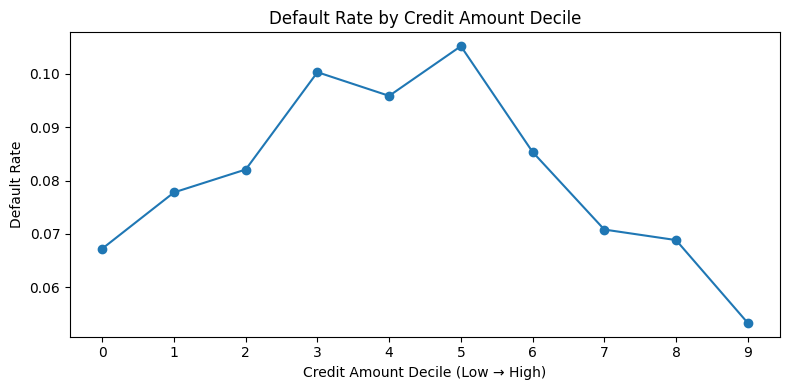

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(range(len(credit_rate)), credit_rate['TARGET'], marker='o')
plt.title('Default Rate by Credit Amount Decile')
plt.xlabel('Credit Amount Decile (Low → High)')
plt.ylabel('Default Rate')
plt.xticks(range(len(credit_rate)))
plt.tight_layout()
plt.show()

The default rate does not increase smoothly as credit amount increases. Instead, the pattern is more mixed. The default rate rises from about 6.7% in the lowest credit decile ($45k–$180k) to around 10% in the mid-range credit groups. For example, the group around $306k–$432k has a default rate of about 10.0%, and the $513k–$604k group reaches about 10.5%, which is one of the highest points.

However, the default rate becomes lower again for larger credit amounts. The top credit decile ($1.13M–$4.05M) has the lowest default rate at about 5.3%. Overall, this suggests that loan size alone is not enough to explain default risk, and it is likely interacting with other factors such as income level, applicant selection, or loan type, which we will explore further in later sections.

-------

### 4.3 Default Rate by Categorical Variables

In this subsection, we examine how default rates differ across several categorical variables. These variables capture basic applicant characteristics and asset ownership, and comparing default rates across categories can reveal simple but informative patterns.

For each categorical variable, we calculate the average default rate within each category and compare the results. This helps identify whether certain groups tend to have higher or lower default risk.

,default_rate
CODE_GENDER,
M,0.101419
F,0.069993
XNA,0.000000


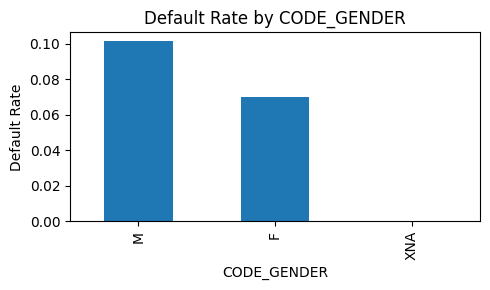

,default_rate
FLAG_OWN_CAR,
N,0.085002
Y,0.072437


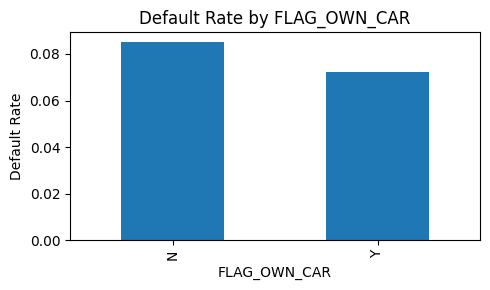

,default_rate
FLAG_OWN_REALTY,
N,0.083249
Y,0.079616


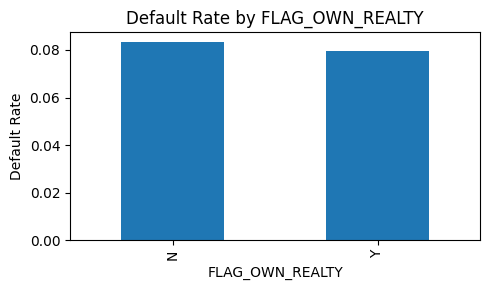

In [ ]:
cat_cols = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']

for col in cat_cols:
    rate = app.groupby(col)['TARGET'].mean().sort_values(ascending=False)

    display(rate.to_frame('default_rate'))

    plt.figure(figsize=(5,3))
    rate.plot(kind='bar')
    plt.title(f'Default Rate by {col}')
    plt.xlabel(col)
    plt.ylabel('Default Rate')
    plt.tight_layout()
    plt.show()

The default rate differs across categories for these variables. For example, applicants with different asset ownership statuses or demographic characteristics show noticeable differences in average default rates. These results suggest that categorical features may capture meaningful differences in applicant stability and financial background.

------

### 4.4 Default Rate by Credit Bureau Requests

In this subsection, we examine how default rates vary with the number of recent credit bureau requests. These variables reflect how frequently an applicant’s credit was checked in different time windows and can be seen as a proxy for recent credit-seeking behavior.

Because these features contain many zero values, we focus on a small number of representative time windows and compare default rates across different request counts.

In [ ]:
bureau_pick = [
    'AMT_REQ_CREDIT_BUREAU_MON',
    'AMT_REQ_CREDIT_BUREAU_YEAR'
]

for col in bureau_pick:
    df = app[['TARGET', col]].copy()
    df[col] = df[col].fillna(0).clip(upper=10)

,default_rate
AMT_REQ_CREDIT_BUREAU_MON,
0.0,0.081922
1.0,0.077232
2.0,0.070368
3.0,0.054244
4.0,0.055762
5.0,0.066445
6.0,0.052478
7.0,0.057047
8.0,0.032432


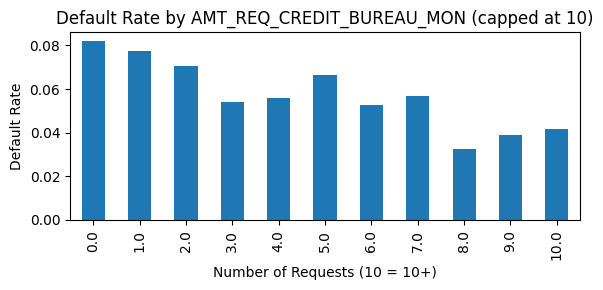

,default_rate
AMT_REQ_CREDIT_BUREAU_YEAR,
0.0,0.083083
1.0,0.073338
2.0,0.081049
3.0,0.079577
4.0,0.082553
5.0,0.083223
6.0,0.090713
7.0,0.092013
8.0,0.086037


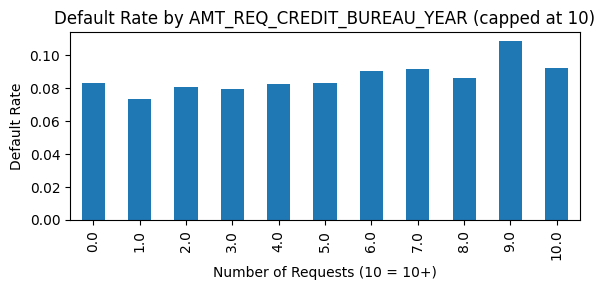

In [ ]:
for col in bureau_pick:
    df = app[['TARGET', col]].copy()
    df[col] = df[col].fillna(0).clip(upper=10)

    rate = df.groupby(col)['TARGET'].mean()

    display(rate.to_frame('default_rate'))

    plt.figure(figsize=(6,3))
    rate.plot(kind='bar')
    plt.title(f'Default Rate by {col} (capped at 10)')
    plt.xlabel('Number of Requests (10 = 10+)')
    plt.ylabel('Default Rate')
    plt.tight_layout()
    plt.show()

The relationship between credit bureau request counts and default is not perfectly monotonic. For monthly requests, the default rate is about 8.2% for applicants with zero requests and generally trends downward for higher request counts, reaching around 5–6% for several mid-to-high values (and even lower for very high counts).

For yearly requests, the pattern is more mixed. The default rate is about 8.3% at zero requests and stays in a similar range for many low-to-mid counts, but it becomes noticeably higher for some higher request counts (for example, around 10.9% at 9 requests, and about 9% around 6–10 requests).

Overall, these results suggest that credit bureau request behavior is related to default risk, but the relationship is not simple. Some of the fluctuations at higher request counts may also be influenced by smaller sample sizes in those groups.

------

## Section 5 — Segment and Interaction Analysis(Lujun & Brooke)

In this section, we move beyond individual variables and examine how combinations of features relate to default behavior. While single variables can provide useful signals, default risk is often influenced by interactions between multiple factors.

By analyzing selected segments of applicants, we aim to identify groups that exhibit noticeably higher or lower default rates. This approach helps provide a more realistic view of risk and sets the stage for more informed decision-making.

-------

### 5.1 Interaction Between Income and Credit Amount

In this subsection, we examine how income level and credit amount interact with each other in relation to default risk. Looking at these variables together allows us to identify segments of applicants that may face higher or lower repayment risk than what would be suggested by either variable alone.

To do this, we group applicants into income and credit amount bins and calculate the default rate for each combination. The results are presented using a heatmap to highlight differences across segments.

In [ ]:
df_seg = app[['TARGET', 'AMT_INCOME_TOTAL', 'AMT_CREDIT']].copy()
df_seg = df_seg.dropna(subset=['AMT_INCOME_TOTAL', 'AMT_CREDIT'])

df_seg['income_bin'] = pd.qcut(df_seg['AMT_INCOME_TOTAL'], q=4, duplicates='drop')
df_seg['credit_bin'] = pd.qcut(df_seg['AMT_CREDIT'], q=4, duplicates='drop')

In [ ]:
heatmap_data = (
    df_seg
    .groupby(['income_bin', 'credit_bin'])['TARGET']
    .mean()
    .reset_index()
    .pivot(index='income_bin', columns='credit_bin', values='TARGET')
)

heatmap_data

/tmp/ipython-input-2030742944.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['income_bin', 'credit_bin'])['TARGET']


credit_bin,"(44999.999, 270000.0]","(270000.0, 513531.0]","(513531.0, 808650.0]","(808650.0, 4050000.0]"
income_bin,,,,
"(25649.999, 112500.0]",0.072124,0.101281,0.091304,0.071009
"(112500.0, 147150.0]",0.074730,0.099806,0.092499,0.069200
"(147150.0, 202500.0]",0.073198,0.096803,0.096674,0.066767
"(202500.0, 117000000.0]",0.068259,0.084007,0.085113,0.053698


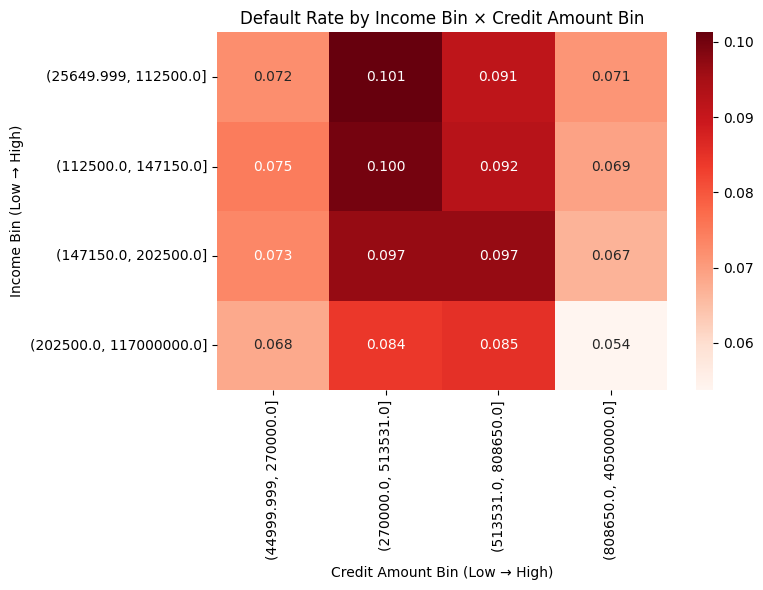

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(heatmap_data, annot=True, fmt=".3f", cmap="Reds")
plt.title('Default Rate by Income Bin × Credit Amount Bin')
plt.xlabel('Credit Amount Bin (Low → High)')
plt.ylabel('Income Bin (Low → High)')
plt.tight_layout()
plt.show()

The heatmap shows clear differences in default rates across income and credit amount combinations. Overall, applicants with lower income and medium-sized credit amounts tend to have higher default rates.

For example, in the lowest income group ($25.6k–$112.5k), the default rate reaches about 10.1% for applicants in the second credit amount bin ($270k–$513k), which is one of the highest values in the heatmap. Similar patterns can be observed in the next two income groups, where default rates are close to or above 9% for medium credit levels.

In contrast, applicants with higher income and higher credit amounts generally show lower default rates. In the highest income group ($202.5k+), the default rate drops to around 5.4% for the largest credit amount bin, which is the lowest value in the chart. These results suggest that considering income and credit amount together provides more information about default risk than examining either variable alone.

-------

### 5.2 Previous Application History and Default Risk

In this subsection, we explore whether an applicant’s previous loan application history is related to default risk in the current application. The `previous_application` dataset contains outcomes such as approved, refused, cancelled, and unused offers.

To analyze this, we first summarize previous applications at the applicant level (grouped by `SK_ID_CURR`) and then merge these summary features into the main application dataset. We then compare default rates across groups defined by past application outcomes (for example, applicants with past refusals vs. those without).

In [ ]:
prev_agg = prev.groupby('SK_ID_CURR').size().to_frame('prev_app_count')

status_ct = (
    prev.pivot_table(
        index='SK_ID_CURR',
        columns='NAME_CONTRACT_STATUS',
        values='SK_ID_PREV',
        aggfunc='count',
        fill_value=0
    )
)

prev_features = prev_agg.join(status_ct, how='left').fillna(0)

approved = prev_features.get('Approved', 0)
refused  = prev_features.get('Refused', 0)
cancelled = prev_features.get('Cancelled', 0)
unused = prev_features.get('Unused offer', 0)

prev_features['prev_approved_rate'] = approved / prev_features['prev_app_count']
prev_features['prev_refused_rate']  = refused  / prev_features['prev_app_count']
prev_features['prev_cancel_rate']   = cancelled / prev_features['prev_app_count']
prev_features['prev_unused_rate']   = unused / prev_features['prev_app_count']

prev_features.head()

,prev_app_count,Approved,Canceled,Refused,Unused offer,prev_approved_rate,prev_refused_rate,prev_cancel_rate,prev_unused_rate
SK_ID_CURR,,,,,,,,,
100001,1,1,0,0,0,1.0,0.0,0.0,0.0
100002,1,1,0,0,0,1.0,0.0,0.0,0.0
100003,3,3,0,0,0,1.0,0.0,0.0,0.0
100004,1,1,0,0,0,1.0,0.0,0.0,0.0
100005,2,1,1,0,0,0.5,0.0,0.0,0.0


In [ ]:
app_merged = app.merge(prev_features, on='SK_ID_CURR', how='left')

fill_cols = ['prev_app_count', 'prev_approved_rate', 'prev_refused_rate', 'prev_cancel_rate', 'prev_unused_rate']
for c in fill_cols:
    app_merged[c] = app_merged[c].fillna(0)

app_merged[fill_cols + ['TARGET']].head()

,prev_app_count,prev_approved_rate,prev_refused_rate,prev_cancel_rate,prev_unused_rate,TARGET
0,1.0,1.000000,0.000000,0.0,0.0,1
1,3.0,1.000000,0.000000,0.0,0.0,0
2,1.0,1.000000,0.000000,0.0,0.0,0
3,9.0,0.555556,0.111111,0.0,0.0,0
4,6.0,1.000000,0.000000,0.0,0.0,0


In [ ]:
app_merged['has_refused_before'] = np.where(app_merged.get('Refused', 0) > 0, 'Yes', 'No')

rate_refused = app_merged.groupby('has_refused_before')['TARGET'].mean()

rate_refused

,TARGET
has_refused_before,
No,0.069845
Yes,0.103217


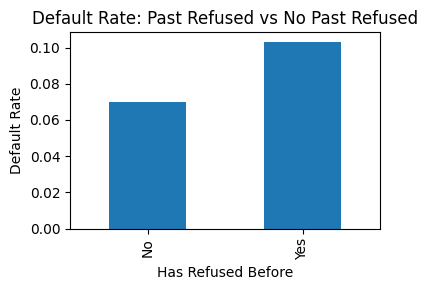

In [ ]:
plt.figure(figsize=(4,3))
rate_refused.plot(kind='bar')
plt.title('Default Rate: Past Refused vs No Past Refused')
plt.xlabel('Has Refused Before')
plt.ylabel('Default Rate')
plt.tight_layout()
plt.show()

In [ ]:
bins = [-0.1, 0, 1, 3, 6, np.inf]
labels = ['0', '1', '2–3', '4–6', '7+']
app_merged['prev_app_count_bin'] = pd.cut(app_merged['prev_app_count'], bins=bins, labels=labels)

rate_count = app_merged.groupby('prev_app_count_bin')['TARGET'].mean()

rate_count

/tmp/ipython-input-3910780298.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rate_count = app_merged.groupby('prev_app_count_bin')['TARGET'].mean()


,TARGET
prev_app_count_bin,
0,0.059560
1,0.083757
2–3,0.078368
4–6,0.077685
7+,0.089570


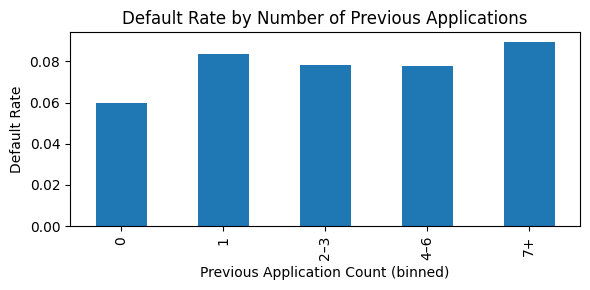

In [ ]:
plt.figure(figsize=(6,3))
rate_count.plot(kind='bar')
plt.title('Default Rate by Number of Previous Applications')
plt.xlabel('Previous Application Count (binned)')
plt.ylabel('Default Rate')
plt.tight_layout()
plt.show()

In [ ]:
app_merged['prev_refused_rate_bin'] = pd.cut(
    app_merged['prev_refused_rate'],
    bins=[-0.01, 0, 0.25, 0.5, 0.75, 1.0],
    labels=['0', '(0,0.25]', '(0.25,0.5]', '(0.5,0.75]', '(0.75,1]']
)

rate_ref_rate = app_merged.groupby('prev_refused_rate_bin')['TARGET'].mean()
rate_ref_rate

/tmp/ipython-input-3874507510.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rate_ref_rate = app_merged.groupby('prev_refused_rate_bin')['TARGET'].mean()


,TARGET
prev_refused_rate_bin,
0,0.069845
"(0,0.25]",0.081144
"(0.25,0.5]",0.113299
"(0.5,0.75]",0.155754
"(0.75,1]",0.177904


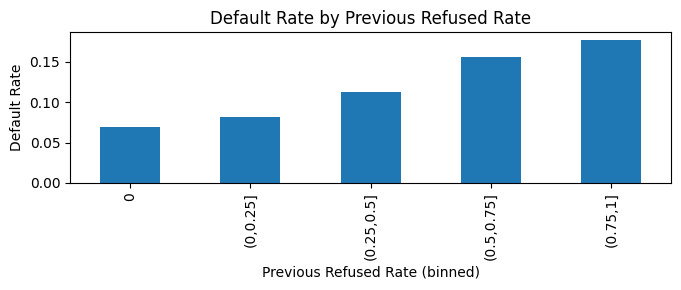

In [ ]:
plt.figure(figsize=(7,3))
rate_ref_rate.plot(kind='bar')
plt.title('Default Rate by Previous Refused Rate')
plt.xlabel('Previous Refused Rate (binned)')
plt.ylabel('Default Rate')
plt.tight_layout()
plt.show()

The results show a clear relationship between previous application history and default risk in the current application. Applicants who have experienced at least one refused application in the past have a noticeably higher default rate than those with no past refusals. Specifically, applicants with no past refusals have a default rate of around 7%, while those with at least one refusal show a higher default rate of about 10%.

Default risk also varies with the number of previous applications. Applicants with no previous applications have the lowest default rate (around 6%), while those with one or multiple past applications generally show higher default rates, reaching close to 9% for applicants with seven or more previous applications.

In addition, the default rate increases steadily with the previous refused rate. Applicants whose past applications were mostly refused (refused rate above 75%) have a default rate of nearly 18%, compared to about 7% for applicants with no past refusals. This clear upward trend suggests that a history of repeated refusals is strongly associated with higher default risk.

## Section 6 - Insights and Analysis (Brooke)

 This analysis provides a clearer understanding of which types of applicants are more likely to experience repayment difficulties and how different aspects of their financial profiles relate to default risk. Looking across the univariate, bivariate, and segment analyses, several consistent patterns emerge.

Income shows one of the strongest relationships with default behavior. Applicants in the lower income ranges tend to default at higher rates, whereas those with higher incomes generally default less often. Although the trend is not perfectly linear across every group, the overall pattern suggests that income is an important indicator of repayment capacity.

Credit amount behaves differently. When examined on its own, loan size does not follow a simple pattern in relation to default. Instead, default rates rise in the middle credit ranges and then fall for the largest loans. This indicates that the size of the loan cannot be evaluated alone, and that other elements such as income level or lender screening practices may shape the observed risk patterns.

When income and credit amount are considered together, the interaction becomes clearer. Higher default rates are concentrated among applicants with lower incomes who are seeking medium-sized loans. In contrast, higher-income applicants with larger credit amounts generally show lower default rates. This reinforces the idea that risk depends on whether the loan amount is appropriate relative to an applicant's financial capacity, rather than on loan size alone.

Asset ownership, examined in the univariate analysis, highlighted differences in whether applicants own a car or real estate. While we did not measure the direct relationship between these variables and default, they help describe variations in financial stability.

Credit bureau request behavior adds another layer to the picture. Many applicants have no recent credit inquiries, and the default rates associated with different request counts do not form a perfect pattern. However, these variables capture different forms of credit-seeking activity and can provide useful context when interpreted with features such as income, loan size, and previous application outcomes.

## Conclusion (Brooke)

Overall, this exploratory analysis demonstrates how applicants' financial profiles, borrowing histories, and loan characteristics collectively inform repayment risk. The strongest and most consistent signals result from income, the interaction between income and credit amount, and the patterns observed in previous loan applications, particularly past refusals. EDA doesn't build a model on its own, but it shows which factors are most informative and should be studied more closely in later modeling or policy decisions. These insights can help support more consistent, data-driven decision-making as lenders assess the worthiness and reliability of applicants.